## veri setinin hikayesi


barplot: sütun grafiği
elimizdeki kategorik değişkenleri görselleştirmek için kullanılır.

**veri setinin hikayesi**

price: dolar cinsinde fiyat (326 - 18.832)

carat: ağırlık (0.2 - 5.01)

cut: kalite (fair, good, very good, premium, ideal)

color: renk (from J(worst) to D(best))

clarity: temizliği, berraklığı (I1(worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best))

x: lenght in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 \* z / (x + y) (43 - 79)

table: elmasın en genii noktasına göre genişliği (43 - 95)


In [1]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### ========================================================

#### **veri setine hizli bakis**


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [5]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

#### ========================================================

#### **ordinal tanimlama** - sirali olarak tanimlama


In [6]:
from pandas.api.types import CategoricalDtype

In [7]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [8]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True))
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [9]:
# yukarida gozuken siralama, veri setine gore programin kendi olusturdugu siralama
# eger veri setinin hikayesi kismindaki siralamaya uygun olmazsa (ki olmadi) bir liste olusturup yeniden siralamamiz gerekiyor

cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(
    categories=cut_kategoriler, ordered=True))
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [10]:
color_kategoriler = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(
    categories=color_kategoriler, ordered=True))
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [11]:
clarity_kategoriler = ["I2", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df.clarity = df.clarity.astype(
    CategoricalDtype(categories=clarity_kategoriler, ordered=True)
)
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I2' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

#### ========================================================

#### **sutun grafiginin (barplot) olusturulmasi**


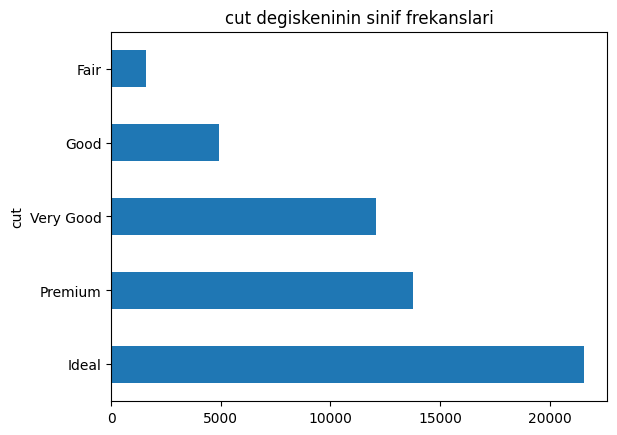

In [12]:
df['cut'].value_counts().plot.barh().set_title(
    'cut degiskeninin sinif frekanslari')

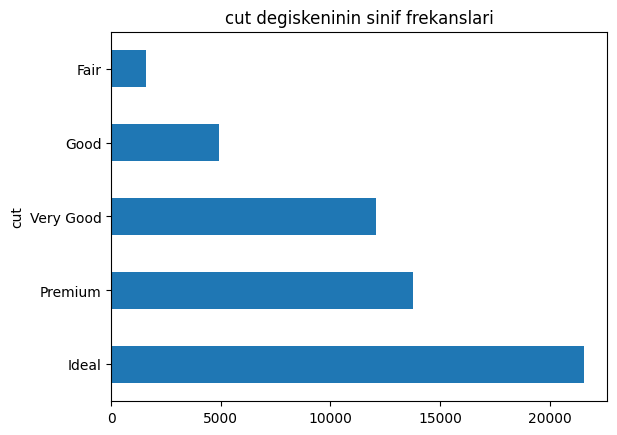

In [13]:
(df['cut']
 .value_counts()
 .plot.barh()
 .set_title('cut degiskeninin sinif frekanslari'))

# daha duzgun gozukmesi icin bu ayni kod bu sekilde de yazilabilir
# basina ve sonuna parantez eklenmesi sartiyla

## **ustteki ve onceki derslerdeki grafiklerin hepsi pandas ile olusturulmus grafikler**

**bundan sonrasi ise seaborn ile cizilen grafikler olacak**


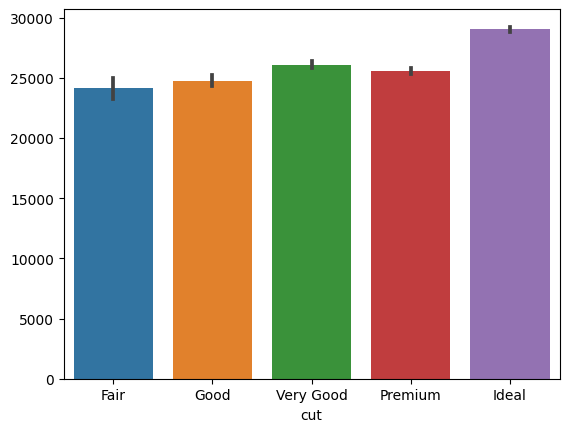

In [14]:
sns.barplot(x='cut', y=df.cut.index, data=df)